<a href="https://colab.research.google.com/github/ParalelaUnsaac/Grupo-1-Los-Huaqueros-de-Eldlich-The-Golden-Lord/blob/ReadmeEdit/SudokuCConMoDEf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa Sudoku NxN**

Nuestro programa realizara un soluciion del sudoku de nxn dimensiones.


Sudoku 4x4

https://drive.google.com/file/d/1o0zt4Ofuyp_InXM9wb1aWzJktfvRFZDb/view?usp=sharing

Sudoku 9x9

https://drive.google.com/file/d/1Bxb63DIOqoPCy-wkyBE0nD1o0kqtx3Nm/view?usp=sharing

Sudoku 16x16

https://drive.google.com/file/d/1xoSJadH5Q3YmkPP1xEEu6zoJJfjANaaw/view?usp=sharing

Sudoku 25x25

https://drive.google.com/file/d/1TpzPeXHgPwhMBjetrnu-vRYzd1AseZoL/view?usp=sharing

En la parte inferior se muestra una idea de un sudoku incompleto dicha imagen se obtuvo de la pagina
http://www.sudoku-download.net/index.php

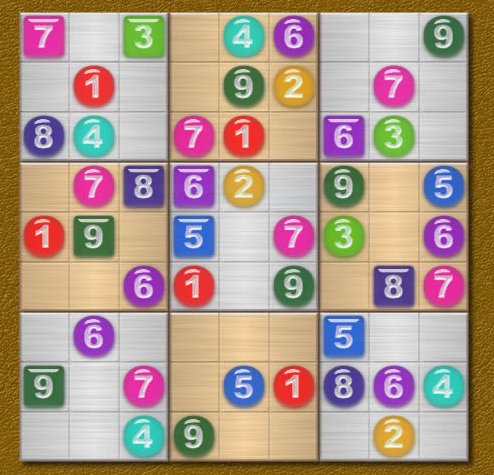

# **Librerias necesarias**
Intalamos las librerias necesarias para ejecutarlo en c

In [ ]:
!apt list --installed

Aqui tendremos el codigo de nuestro programa, estamos utilizando las librerias de openMP para paralelizar y poder utilizar distintos hilos. Las Librerias stdbool para trabajar con modulos que devuelven valores booleanos

In [45]:
sudoku="" #Limpia si hubiese algun string en la variable sudoku
sudoku="""
#include <stdio.h>
#include<omp.h>
#include <time.h>
#include <stdlib.h>
#include <math.h>
#include<stdbool.h>// Booleanos
#define N 9
"""

# **Modulo mostrar sudoku**

En esta parte de nuestro codigo se declara nuestro matriz nxn y tambien esta el modulo mostrar



In [46]:
sudoku+="""
int MatrizSudok [N][N];
void MostrarSudoku() {
  printf("\\n");
  for (int Fila = 0; Fila < N; Fila++) {
    for (int Columna = 0; Columna < N; Columna++) {
      printf("%d\t ",MatrizSudok[Fila][Columna]);
      }
    printf("\\n \\n \\n");
  }
}
  """

# **Modulo es Seguro:**
1. Verificamos que en la fila no se repita valores.
2. Verificamos que no se repitan valores en la columna.
3. Verificamos en los bloques de dimension n^(1/2) x n^(1/2) que los valores de 1 hasta n no se repitan.



In [47]:
sudoku+="""
bool EsSeguro(int Fila, int Columna, int Num){
    //---Verifica en la Fila
    for (int d = 0; d < N; d++)
    {
        if (MatrizSudok[Fila] [d] == Num)
        {
            return false;
        }
    }
    //---Verifica en la Columna
    for (int r = 0; r < N; r++)
    {
        if (MatrizSudok[r] [Columna] == Num)
        {
            return false;
        }
    }
    //---Saca la raiz cuadrada de N
    int raizCu = sqrt(N);
    int CuadroDeFila = Fila - Fila % raizCu;
    int CuadroDeColumna = Columna - Columna % raizCu;
    for (int r = CuadroDeFila; r < CuadroDeFila + raizCu; r++)
    {
        for (int d = CuadroDeColumna; d < CuadroDeColumna + raizCu; d++)
        {
            if (MatrizSudok[r] [d] == Num)
            {
                return false;
            }
        }
    }
    return true;
}"""

# **Resolver sudoku:**
Aqui resolvemos nuestro sudoku aplicando bactraking

In [48]:
sudoku+="""
bool ResolverSudoku(){
   int Fila = -1;
    int Columna = -1;
    bool EstaVacio = true;
    #pragma omp parallel for
    for (int i = 0; i < N; i++)
    {
        for (int j = 0; j < N; j++)
        {
            if (MatrizSudok[i][j] == 0)
            {
                Fila = i;
                Columna = j;
                EstaVacio = false;
            }
        }
    }
    if (EstaVacio)
    {
        return true;
    }
    for (int Num = 1; Num <= N; Num++)
    {
        if (EsSeguro(Fila, Columna, Num))
        {
            MatrizSudok[Fila][Columna] = Num;
            if (ResolverSudoku())
            {
                return true;
            }
            else
            {
                MatrizSudok[Fila][Columna] = 0;
            }
        }
    }
    return false;
}"""

# **Main Conductor del programa:**
Aqui es el main principal para poder ejecutar y concluir nuestra ejecución

In [49]:
sudoku+="""int main() { 
  int i,j;
  for (i = 0; i < N; i++) {
    for (j = 0; j < N; j++) {
      MatrizSudok[i][j] = 0;
      }
  }
  ResolverSudoku();
  MostrarSudoku();
}"""

Compilamos nuestro programa como sudoku.c, para luego poder ejecutarlo

In [50]:
text_file = open("sudoku.c", "w")
text_file.write(sudoku)
text_file.close()

En esta indicamos la cantidad de hilos que vamos utilizar, podrias asumir el tamaño N con la cantidad de hilos

In [51]:
%env OMP_NUM_THREADS=9

env: OMP_NUM_THREADS=16


In [52]:
!gcc -o sudokuMatriz -fopenmp sudoku.c

In [53]:
!./sudokuMatriz


2	 6	 5	 1	 3	 9	 4	 7	 8	 
 
 
1	 3	 8	 4	 7	 5	 2	 9	 6	 
 
 
7	 4	 9	 2	 6	 8	 1	 3	 5	 
 
 
8	 9	 6	 7	 5	 4	 3	 1	 2	 
 
 
5	 7	 4	 3	 1	 2	 8	 6	 9	 
 
 
3	 1	 2	 9	 8	 6	 7	 5	 4	 
 
 
6	 2	 1	 5	 4	 3	 9	 8	 7	 
 
 
9	 8	 7	 6	 2	 1	 5	 4	 3	 
 
 
4	 5	 3	 8	 9	 7	 6	 2	 1	 
 
 


# **Aspectos adicionales:**

La siguiente figura nos muestra un soduku solicionado por nuestro algoritmo en C#, puesto que le aplicamos grafica o windows form.


Es la solucion del problema que nos hemos planteado. Se que el sudoku es unos de los juegos mas populares que vienen en los periodicos y nuestro algoritmo nos permite encontrar la solucion al mismo instante

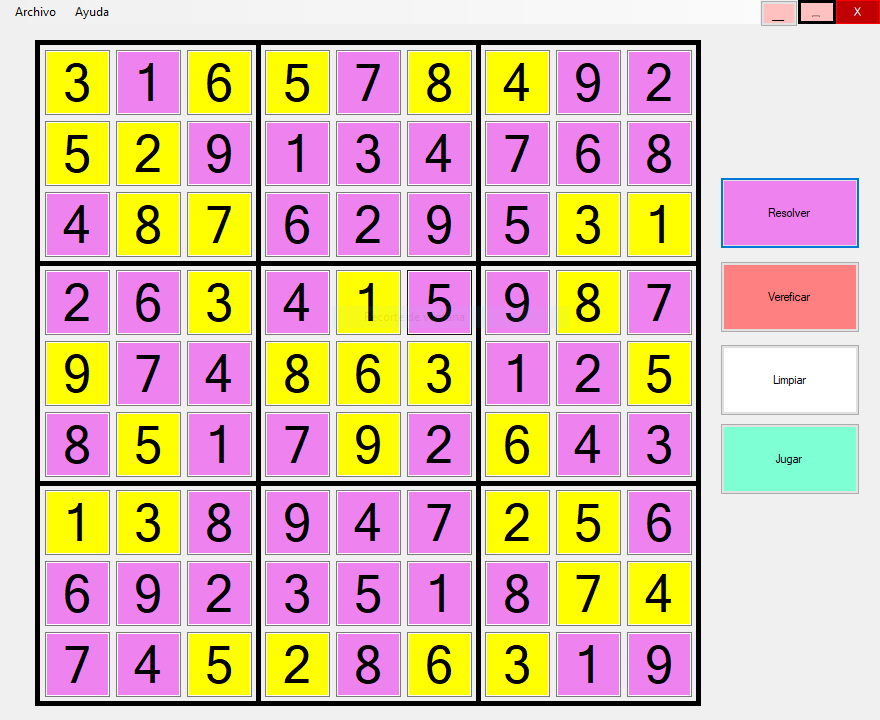